#**Author**
**Student Name :** Ankita Shukla

**Student Id:** 230227307

##**1 Problem formulation**

Intially, the motivation was to create a machine learning pipeline that would tell us whether an image is of a restaurant or a homemade dish. But upon doing sanity testing on some images, it was observed that there were not many differentiating features in both.

I looked at some sample images of the dishes and observed that Indian dishes have a very different colour and textures. **So, the final problem I decided to solve was to train and identify if a dish is Indian or not.** Being someone who hails from Indian, I found the problem really interesting as I feel Indian food is visibally very different from all other cuisines.

##2 Machine Learning pipeline

The Machine Learning Pipeline can be described into the following steps:

*   **Setting up Data:** Using MLEND library, yummy dataset is downloaded that contains 3250 images and a CSV file with their attributes. These serve us as the input data

*  **Defining Training and Test datasets:** We load the dataset using yummy_load function of MLEND and that gives us Training and Test dataset

*   **Modifying Train and Test sets:** Added a field 'Y_encoded' to both TrainSet and TestSet that sets the benchmark for Indian dishes. Indian dishes are marked as 1 and rest as 0.  

*   **Preprocessing Images:** All images are different sizes; so all are transformed into a square and resized into a standard size. All images are then added to numpy arrays: X_train and X_test which will be used as Training and Test data for next steps

*   **Feature Extractions:** Using the colour

*   **Model Selection:**

*   Training
*   Evaluation

*   Hyperparameter tuning
*   List item








The Machine Learning Pipeline can be described into the following steps:

*   **Setting up Data:** Using MLEND library, yummy dataset is downloaded that contains 3250 images and a CSV file with their attributes. These serve us as the input data

*  **Defining Training and Test datasets:** We load the dataset using yummy_load function of MLEND and that gives us Training and Test dataset

*   **Modifying Train and Test sets:** Added a field 'Y_encoded' to both TrainSet and TestSet that sets the benchmark for Indian dishes. Indian dishes are marked as 1 and rest as 0.  

*   **Preprocessing Images:** All images are different sizes; so all are transformed into a square and resized into a standard size. All images are then added to numpy arrays: X_train and X_test which will be used as Training and Test data for next steps

*   **Feature Extractions:** Using the colours, textures and shape and size of the image

*   **Model Selection:** A few different models are tried against the training and test sets

*   **Training:** TrainSet was trained against different ML models like KNN, RandomForest etc

*   **Evaluation:** The results are evaluated against accuracy and confusion matrix









**Installing required MLEND library**

In [3]:
# Environment setup
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00


**Mounting Google Drive**

In [4]:
# Importing required packages and mounting google drive

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


**Downloading the Data and Loading attributes**

In [5]:
# Downloading data
baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

# Location of folder
os.listdir(baseDir)

# Please change the CSV file path accordingly. (Need to be using the CSV that contains attributes about all images)
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_full_data.csv').set_index('filename')
MLENDYD_df


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


**Defining Training and Test Sets**

In [6]:
# Classifying data into Training and Test sets based upon Benchmark column present in attributes csv

TrainSet, TestSet, Map = yummy_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 3250 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/


**Adding true values to Train and Test sets**

In [7]:
# Adding true values as Y_encoded to TrainSet and TestSet

indian_nonindian = []
for cuisine in TrainSet['Y']['Cuisine']:
  if "indian" in str(cuisine):
    indian_nonindian.append(1)
  else:
    indian_nonindian.append(0)

TrainSet['Y_encoded'] = np.array(indian_nonindian)


indian_nonindian = []
for cuisine in TestSet['Y']['Cuisine']:
  if "indian" in str(cuisine):
    indian_nonindian.append(1)
  else:
    indian_nonindian.append(0)

TestSet['Y_encoded'] = np.array(indian_nonindian)


In [8]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Indian Food Images


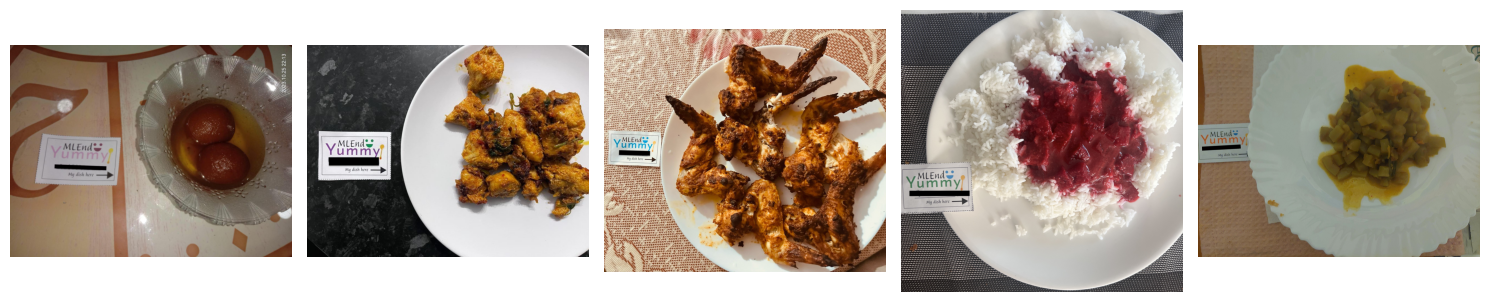

Non Indian Food Images


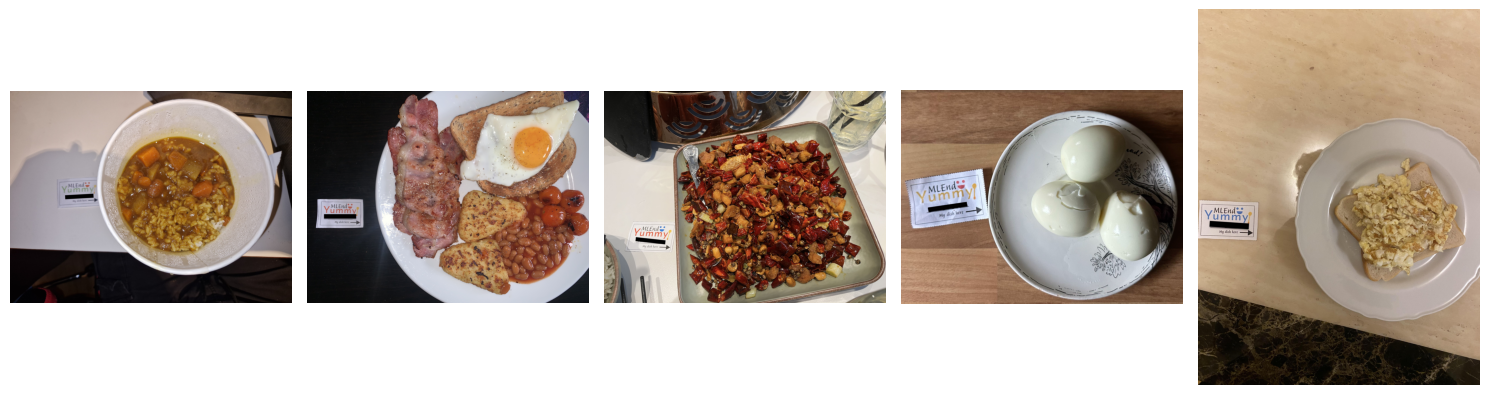

In [9]:
import numpy as np

# Visualising dishes
Indian_food_images = np.array(X_train_paths)[Y_train==1]
Non_indian_food_images = np.array(X_train_paths)[Y_train==0]

print('Indian Food Images')
plt.figure(figsize=(15,5))
for k,file in enumerate(Indian_food_images[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Non Indian Food Images')
plt.figure(figsize=(15,5))
for k,file in enumerate(Non_indian_food_images[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

**Preprocessing, Resizing and Normalising the image**

In [10]:
# Preprocessing and normalising the images

def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

**Modifying TrainSet and TestSet to contain a numpy array of normalised images**

In [11]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|2275\2275|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|975\975|
Done!


((2275, 200, 200, 3), (975, 200, 200, 3))

##**4 Transformation stage**


**Feature Extraction**


*   Extracting Colours from the image
*   Extracting Shape and Size
*   Extracting texture features using Local Binary Patterns (LBP)

Input is the normalised image and we get a numpy array that contains all these features as an output





In [12]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from skimage import feature


# Extract color histogram features
def extract_color_histograms(images):
    histograms = []
    for img in images:
        # Ensure the image is in 8-bit unsigned integer format
        img = np.uint8(img)

        # Convert image to HSV color space
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Calculate histogram for each channel
        hist_hue = cv2.calcHist([hsv], [0], None, [256], [0, 256])
        hist_saturation = cv2.calcHist([hsv], [1], None, [256], [0, 256])
        hist_value = cv2.calcHist([hsv], [2], None, [256], [0, 256])

        # Normalize histograms
        hist_hue /= hist_hue.sum()
        hist_saturation /= hist_saturation.sum()
        hist_value /= hist_value.sum()

        # Concatenate the histograms
        histogram = np.concatenate((hist_hue, hist_saturation, hist_value), axis=None)
        histograms.append(histogram)
    return np.array(histograms)



# Extract shape and size features
def extract_shape_and_size(images):
    features = []
    for img in images:
        # Ensure the image is in 8-bit unsigned integer format
        img = np.uint8(img)

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Threshold the image
        _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
        # Find contours
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Extract shape and size features
        area = cv2.contourArea(contours[0]) if contours else 0
        perimeter = cv2.arcLength(contours[0], True) if contours else 0
        features.append([area, perimeter])
    return np.array(features)



# Extract texture features using Local Binary Patterns (LBP)
def extract_texture_features(images):
    texture_features = []
    for img in images:
        # Ensure the image is in 8-bit unsigned integer format
        img = np.uint8(img)

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Compute LBP
        lbp = feature.local_binary_pattern(gray, P=8, R=1, method="uniform")
        # Calculate histogram of LBP and normalize
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 10))
        hist = hist.astype("float") / hist.sum()
        texture_features.append(hist)
    return np.array(texture_features)




**Confusion Matrix**

In [20]:
def showConfMat(CM, labels = ['Non-Indian','Indian']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

**Combining all Features used**

In [13]:
color_histograms_train = extract_color_histograms(X_train)
color_histograms_test = extract_color_histograms(X_test)


shape_and_size_train = extract_shape_and_size(X_train)
shape_and_size_test = extract_shape_and_size(X_test)

texture_features_train = extract_texture_features(X_train)
texture_features_test = extract_texture_features(X_test)

# Combine features
combined_features_train = np.concatenate((color_histograms_train, shape_and_size_train, texture_features_train), axis=1)
combined_features_test = np.concatenate((color_histograms_test, shape_and_size_test, texture_features_test), axis=1)


**##5. Modelling**

Used KNN, RandomForest and  convolutional neural network (CNN) models

**KNN model**

Test Accuracy: 0.6276923076923077


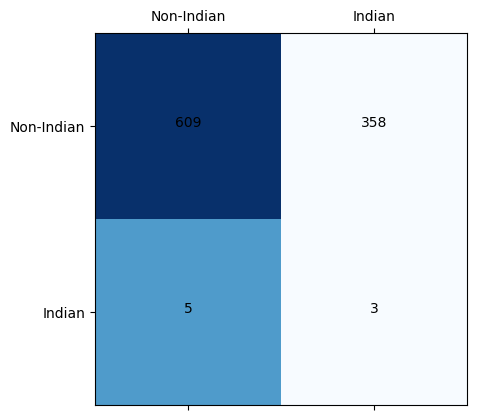

In [21]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Assuming X_train and X_test are numpy arrays of normalized and resized images
y_train = TrainSet['Y_encoded']
y_test = TestSet['Y_encoded']

# Flatten the images for KNN input
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(combined_features_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(combined_features_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


# Calculate the confusion matrix
CM = confusion_matrix(y_test, y_pred)

showConfMat(CM)


**RANDOM FOREST**

Validation Accuracy: 0.6369230769230769
Test Accuracy: 0.6307692307692307


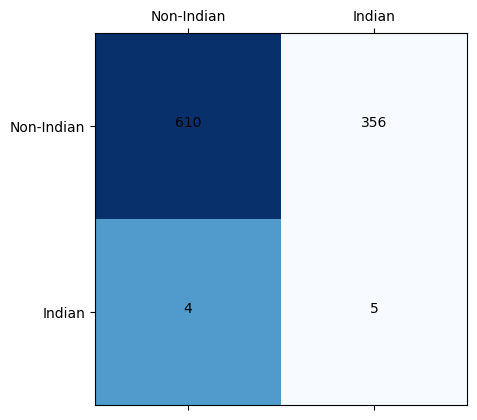

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import layers, models



y_train = TrainSet['Y_encoded']
y_test = TestSet['Y_encoded']


# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf.fit(combined_features_train, y_train)

# Make predictions on the validation set
y_pred_val = rf.predict(combined_features_train)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_train, y_pred_val)
print(f'Validation Accuracy: {accuracy_val}')

# Make predictions on the test set
y_pred_test = rf.predict(combined_features_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test}')


# Calculate the confusion matrix
CM = confusion_matrix(y_test, y_pred_test)

showConfMat(CM)

**Convolutional neural network (CNN)**

In [ ]:
# Split the dataset into training and testing sets
y_train = TrainSet['Y_encoded']
y_test = TestSet['Y_encoded']

# Build the model
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(combined_features_train.shape[1],)),
    layers.Dropout(0.5),  # Add dropout to reduce overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(combined_features_train, y_train, epochs=10, batch_size=32, validation_data=(combined_features_train, y_train))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(combined_features_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


#Methodology

Used the method of training with ~70% of data as train and rest 30% as test

#Dataset

The whole yummy dataset

#Results:

All models perform relatively similar to each other. But CNN takes a slight edge.

#Conclusions:

All models are performing similar because of the relatively small datasets. But CNN will perform better for larger datasets.